# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

In [1]:
import urllib
import requests
import pandas as pd
import os
import pylab as pl
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy as sp
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [2]:
## try to do the extra credit:download directly from google docs with a google API but error
'''
import csv
import gspread
from oauth2client.service_account import ServiceAccountCredentials
scope = ['https://spreadsheets.google.com/spreadsheets/d']
credentials = ServiceAccountCredentials.from_json_keyfile_name('credentials.json', scope)

docid = "/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs"

client = gspread.authorize(credentials)
spreadsheet = client.open_by_key(docid)
for i, worksheet in enumerate(spreadsheet.worksheets()):
    filename = docid + '-worksheet' + str(i) + '.csv'
    with open(filename, 'wb') as f:
        writer = csv.writer(f)
        writer.writerows(worksheet.get_all_values())
        
'''

'\nimport csv\nimport gspread\nfrom oauth2client.service_account import ServiceAccountCredentials\nscope = [\'https://spreadsheets.google.com/spreadsheets/d\']\ncredentials = ServiceAccountCredentials.from_json_keyfile_name(\'credentials.json\', scope)\n\ndocid = "/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs"\n\nclient = gspread.authorize(credentials)\nspreadsheet = client.open_by_key(docid)\nfor i, worksheet in enumerate(spreadsheet.worksheets()):\n    filename = docid + \'-worksheet\' + str(i) + \'.csv\'\n    with open(filename, \'wb\') as f:\n        writer = csv.writer(f)\n        writer.writerows(worksheet.get_all_values())\n        \n'

In [3]:
## try to do the extra credit:download directly from google docs with a google API but error
## Extra credit: download directly from google docs with a google API
'''
file_id = '1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs'
request = drive_service.files().export_media(fileId=file_id,
                                             mimeType='application/pdf')
fh = io.BytesIO()
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print "Download %d%%." % int(status.progress() * 100)
'''

'\nfile_id = \'1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs\'\nrequest = drive_service.files().export_media(fileId=file_id,\n                                             mimeType=\'application/pdf\')\nfh = io.BytesIO()\ndownloader = MediaIoBaseDownload(fh, request)\ndone = False\nwhile done is False:\n    status, done = downloader.next_chunk()\n    print "Download %d%%." % int(status.progress() * 100)\n'

In [4]:
# dowload mass shooting data and move it to PUIdata
url = "data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78"
urllib.request.urlretrieve(url, "mass_shooting.csv")
!mv mass_shooting.csv $PUIDATA

In [5]:
# read mass shooting data
mass_shooting = pd.read_csv(os.getenv("PUIDATA") + "/mass_shooting.csv")

In [6]:
mass_shooting.dropna(axis=0, inplace=True)
mass_shooting.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [7]:
# download population data
url = "http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv"
urllib.request.urlretrieve(url, "world_population.zip")
!unzip world_population.zip -d $PUIDATA

Archive:  world_population.zip
  inflating: /nfshome/hl3282/PUIdata/Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv  
  inflating: /nfshome/hl3282/PUIdata/API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv  
  inflating: /nfshome/hl3282/PUIdata/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv  


In [8]:
#read population data
df_ = pd.read_csv(os.getenv("PUIDATA") + "/API_SP.POP.TOTL_DS2_en_csv_v2_10224786.csv", skiprows=1, header=1)
df_ = df_[['2012','Country Name']]
df_.rename(columns={'2012':'population'}, inplace=True)
df_.dropna(axis=0, inplace=True)
df_.head()

,population,Country Name
0,102577.0,Aruba
1,30696958.0,Afghanistan
2,25096150.0,Angola
3,2900401.0,Albania
4,82431.0,Andorra


In [9]:
# download firearm data
!wget https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv -O world_firearms.csv

--2018-11-14 21:19:29--  https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.200.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.200.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7852 (7.7K) [text/plain]
Saving to: ‘world_firearms.csv’

world_firearms.csv  100%[===================>]   7.67K  --.-KB/s    in 0s      

2018-11-14 21:19:29 (138 MB/s) - ‘world_firearms.csv’ saved [7852/7852]



In [10]:
!mv world_firearms.csv $PUIDATA

In [11]:
# read data
firearms = pd.read_csv(os.getenv("PUIDATA") + "/world_firearms.csv")
firearms = firearms[['Country/Territory', 'Number of homicides by firearm', 'Average total all civilian firearms']]
firearms.dropna(axis=0, inplace=True)
firearms.head()

,Country/Territory,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
4,Argentina,1198.0,3950000.0
5,Armenia,9.0,380000.0
6,Australia,30.0,3050000.0


In [12]:
url = "http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv"
urllib.request.urlretrieve(url, "world_gdp.zip")
!unzip world_gdp.zip -d $PUIDATA

Archive:  world_gdp.zip
  inflating: /nfshome/hl3282/PUIdata/Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv  
  inflating: /nfshome/hl3282/PUIdata/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv  
  inflating: /nfshome/hl3282/PUIdata/Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv  


In [13]:
gdp = pd.read_csv(os.getenv("PUIDATA") + "/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10224782.csv", skiprows=1, header=1)
gdp = gdp[['2012','Country Name']]
gdp.rename(columns={'2012':'gdp'}, inplace=True)
gdp.dropna(axis=0,inplace=True)
gdp.head()

,gdp,Country Name
1,2.053654e+10,Afghanistan
2,1.139232e+11,Angola
3,1.231978e+10,Albania
4,3.164615e+09,Andorra
5,2.786139e+12,Arab World


In [14]:
df_ = df_.merge(gdp, right_on='Country Name', left_on='Country Name')
df_.head()

,population,Country Name,gdp
0,30696958.0,Afghanistan,2.053654e+10
1,25096150.0,Angola,1.139232e+11
2,2900401.0,Albania,1.231978e+10
3,82431.0,Andorra,3.164615e+09
4,373306993.0,Arab World,2.786139e+12


In [15]:
df_ = df_.merge(firearms, right_on='Country/Territory', left_on='Country Name')
df_.head()

,population,Country Name,gdp,Country/Territory,Number of homicides by firearm,Average total all civilian firearms
0,2900401.0,Albania,1.231978e+10,Albania,56.0,270000.0
1,42096739.0,Argentina,5.459824e+11,Argentina,1198.0,3950000.0
2,2881922.0,Armenia,1.061932e+10,Armenia,9.0,380000.0
3,22742475.0,Australia,1.543411e+12,Australia,30.0,3050000.0
4,8429991.0,Austria,4.094252e+11,Austria,18.0,2500000.0


In [16]:
df_ = df_.merge(mass_shooting, right_on='Country', left_on='Country Name')
df_.drop(['Country/Territory'], axis=1, inplace=True)
df_.head()

,population,Country Name,gdp,Number of homicides by firearm,Average total all civilian firearms,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,22742475.0,Australia,1.543411e+12,30.0,3050000.0,Australia,15.0,4
1,8429991.0,Austria,4.094252e+11,18.0,2500000.0,Austria,30.4,1
2,11128246.0,Belgium,4.978842e+11,70.0,1800000.0,Belgium,17.2,2
3,34750545.0,Canada,1.824289e+12,173.0,9950000.0,Canada,30.8,4
4,7996861.0,Switzerland,6.680436e+11,57.0,3400000.0,Switzerland,45.7,2


In [17]:
df_.rename(columns={'Number of mass shootings (1983-2013)':'Number of mass shootings', 'population':'pop'}, inplace=True)
df_.head()

,pop,Country Name,gdp,Number of homicides by firearm,Average total all civilian firearms,Country,Guns per 100 inhabitants,Number of mass shootings
0,22742475.0,Australia,1.543411e+12,30.0,3050000.0,Australia,15.0,4
1,8429991.0,Austria,4.094252e+11,18.0,2500000.0,Austria,30.4,1
2,11128246.0,Belgium,4.978842e+11,70.0,1800000.0,Belgium,17.2,2
3,34750545.0,Canada,1.824289e+12,173.0,9950000.0,Canada,30.8,4
4,7996861.0,Switzerland,6.680436e+11,57.0,3400000.0,Switzerland,45.7,2


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


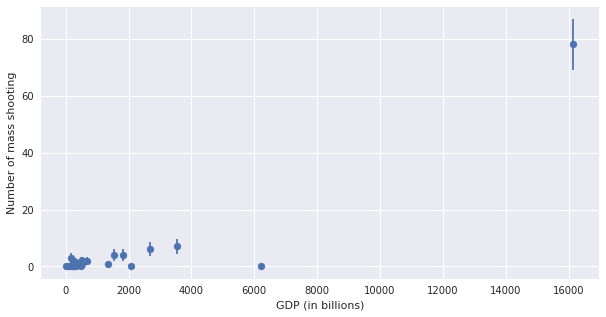

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [18]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")

In [19]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop']*1e3

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


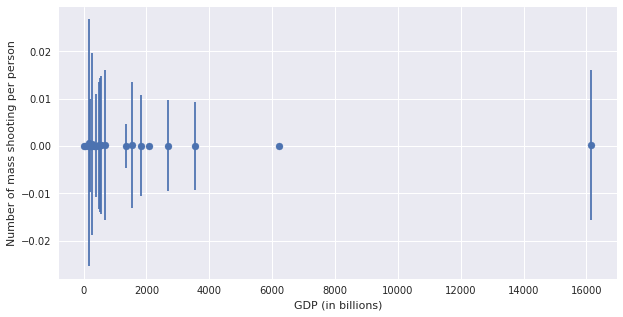

Number of mass shooting per person vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [20]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df_.gdp / 1e9, df_['shootingspp'])
ax.errorbar(df_.gdp / 1e9, df_['shootingspp'], 
            yerr = np.sqrt(df_['shootingspp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


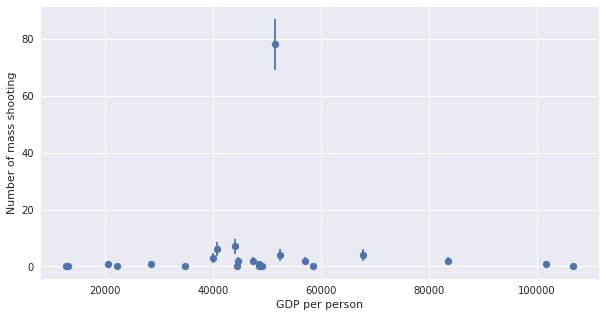

Number of mass shooting vs GDP per person, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [21]:
df_['gdpspp'] = df_['gdp'] / df_['pop']
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df_.gdpspp, df_['Number of mass shootings'])
ax.errorbar(df_.gdpspp, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP per person")
ax.set_ylabel("Number of mass shooting")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP per person, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [22]:
df_['Average_civilian_firearms_pp'] = df_["Average total all civilian firearms"] / df_['pop'] 

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


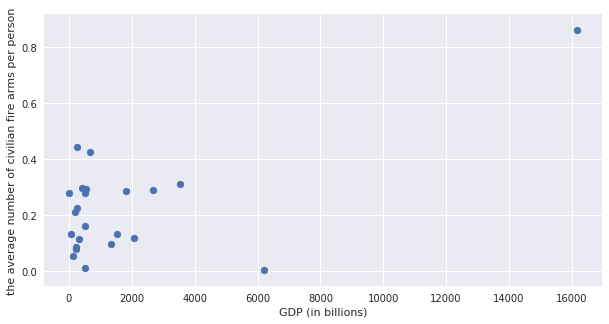

the average number of civilian fire arms per person vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [23]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df_.gdp / 1e9, df_['Average_civilian_firearms_pp'])
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("the average number of civilian fire arms per person")
ax.set_ylim()
pl.show()
print ("the average number of civilian fire arms per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


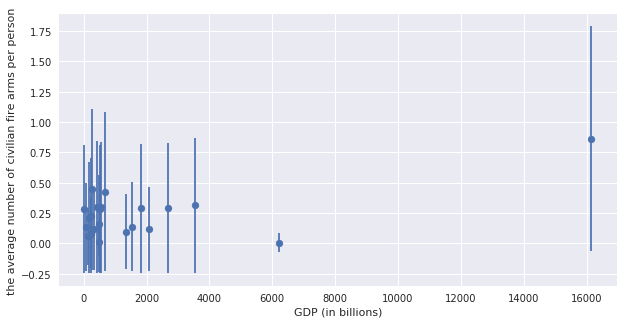

the average number of civilian fire arms per person vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [24]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df_.gdp / 1e9, df_['Average_civilian_firearms_pp'])
ax.errorbar(df_.gdp / 1e9, df_['Average_civilian_firearms_pp'], 
            yerr = np.sqrt(df_['Average_civilian_firearms_pp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("the average number of civilian fire arms per person")
ax.set_ylim()
pl.show()
print ("the average number of civilian fire arms per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


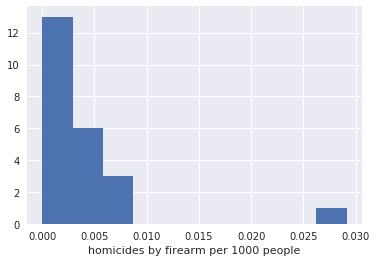

In [25]:
fig, ax = pl.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');
pl.show()

In [26]:
df_['homipp'] = df_['Number of homicides by firearm'] / df_['pop'] * 1000

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


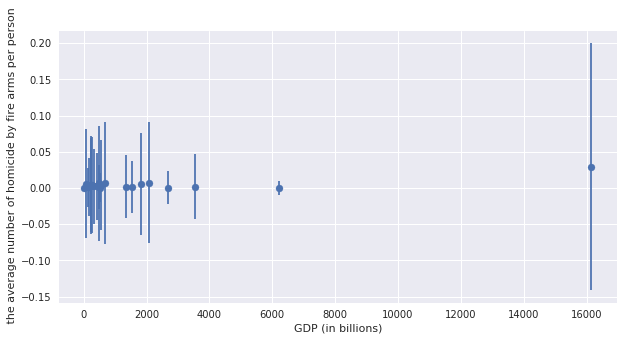

 the average number of homicide by fire arms per person vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [27]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df_.gdp / 1e9, df_['homipp'] )
ax.errorbar(df_.gdp / 1e9, df_['homipp'], 
            yerr = np.sqrt(df_['homipp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel(" the average number of homicide by fire arms per person")
ax.set_ylim()
pl.show()
print (" the average number of homicide by fire arms per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


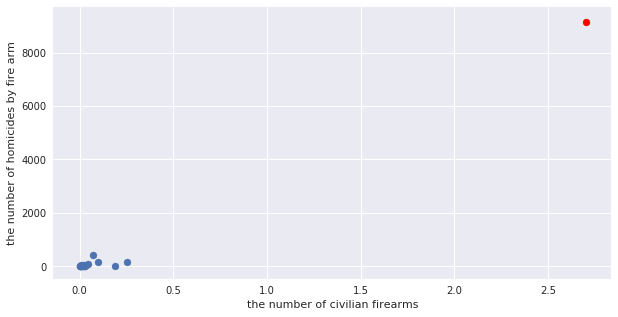

 the number of homicides by fire arm vs the number of civilian firearms, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [28]:
# with errorbars
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter1 = ax.scatter(df_[df_['Country Name'] != 'United States']['Average total all civilian firearms']/1e8, 
                      df_[df_['Country Name'] != 'United States']['Number of homicides by firearm'])
scatter2 = ax.scatter(df_[df_['Country Name'] == 'United States']['Average total all civilian firearms']/1e8, 
                      df_[df_['Country Name'] == 'United States']['Number of homicides by firearm'], c='red')
ax.errorbar(df_[df_['Country Name'] != 'United States']['Average total all civilian firearms']/1e8, 
            df_[df_['Country Name'] != 'United States']['Number of homicides by firearm'], 
            yerr = np.sqrt(df_[df_['Country Name'] != 'United States']['Number of homicides by firearm'] * 1.0), 
            fmt = '.')
ax.errorbar(df_[df_['Country Name'] == 'United States']['Average total all civilian firearms']/1e8, 
            df_[df_['Country Name'] == 'United States']['Number of homicides by firearm'], 
            yerr = np.sqrt(df_[df_['Country Name'] == 'United States']['Number of homicides by firearm'] * 1.0), 
            fmt = '.', 
            c='red')
ax.set_xlabel("the number of civilian firearms")
ax.set_ylabel("the number of homicides by fire arm")
ax.set_ylim()
pl.show()
print (" the number of homicides by fire arm vs the number of civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


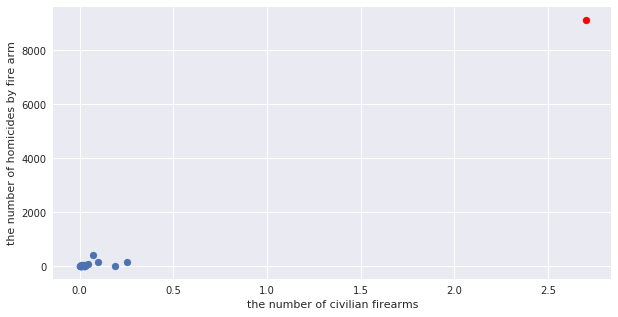

 the number of homicides by fire arm vs the number of civilian firearms, The datapoint to the top right of the plot is the USA, which has both the highest number of civilian firearms  and the number of homicides by fire arm


In [61]:
# without errorbars
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter1 = ax.scatter(df_[df_['Country Name'] != 'United States']['Average total all civilian firearms']/1e8, 
                      df_[df_['Country Name'] != 'United States']['Number of homicides by firearm'])
scatter2 = ax.scatter(df_[df_['Country Name'] == 'United States']['Average total all civilian firearms']/1e8,
                      df_[df_['Country Name'] == 'United States']['Number of homicides by firearm'], c='red')
ax.set_xlabel("the number of civilian firearms")
ax.set_ylabel("the number of homicides by fire arm")
ax.set_ylim()
pl.show()
print (" the number of homicides by fire arm vs the number of civilian firearms, " +  
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest number of civilian firearms  and the number of homicides by fire arm")

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


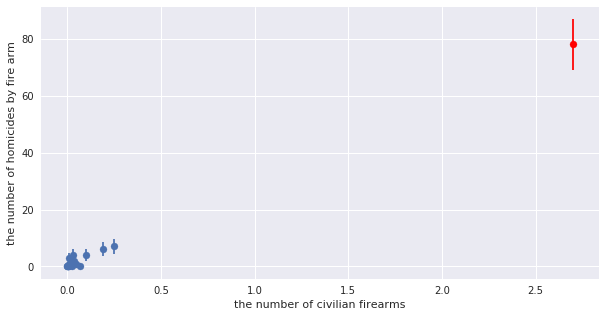

 the number of homicides by fire arm vs the number of civilian firearms, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest number of homicides by fire arm and the highest number of civilian firearms


In [60]:
# with errorbars
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter1 = ax.scatter(df_[df_['Country Name'] != 'United States']['Average total all civilian firearms']/1e8, 
                      df_[df_['Country Name'] != 'United States']['Number of mass shootings'])
scatter2 = ax.scatter(df_[df_['Country Name'] == 'United States']['Average total all civilian firearms']/1e8, 
                      df_[df_['Country Name'] == 'United States']['Number of mass shootings'], c='red')
ax.errorbar(df_[df_['Country Name'] != 'United States']['Average total all civilian firearms']/1e8, 
            df_[df_['Country Name'] != 'United States']['Number of mass shootings'], 
            yerr=np.sqrt(df_[df_['Country Name'] != 'United States']['Number of mass shootings'] * 1.0),
            fmt = '.')
ax.errorbar(df_[df_['Country Name'] == 'United States']['Average total all civilian firearms']/1e8, 
            df_[df_['Country Name'] == 'United States']['Number of mass shootings'], 
            yerr = np.sqrt(df_[df_['Country Name'] == 'United States']['Number of mass shootings'] * 1.0), 
            fmt = '.', c='red')
ax.set_xlabel("the number of civilian firearms")
ax.set_ylabel("the number of homicides by fire arm")
ax.set_ylim()
pl.show()
print (" the number of homicides by fire arm vs the number of civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest number of homicides by fire arm and the highest number of civilian firearms")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


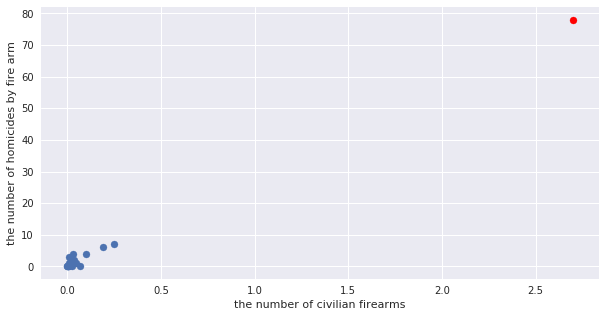

 the number of homicides by fire arm vs the number of civilian firearms, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest number of civilian firearms and the highest number of homicides by fire arm


In [62]:
# without errorbars
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter1 = ax.scatter(df_[df_['Country Name'] != 'United States']['Average total all civilian firearms']/1e8, 
                      df_[df_['Country Name'] != 'United States']['Number of mass shootings'])
scatter2 = ax.scatter(df_[df_['Country Name'] == 'United States']['Average total all civilian firearms']/1e8, 
                      df_[df_['Country Name'] == 'United States']['Number of mass shootings'], c='red')
ax.set_xlabel("the number of civilian firearms")
ax.set_ylabel("the number of homicides by fire arm")
ax.set_ylim()
pl.show()
print (" the number of homicides by fire arm vs the number of civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest number of civilian firearms and the highest number of homicides by fire arm")

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


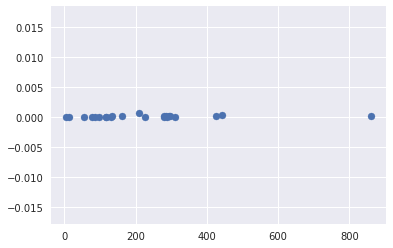

In [32]:
df_['Average_civilian_firearms_pp'] = df_['Average_civilian_firearms_pp']*1000
pl.scatter(df_['Average_civilian_firearms_pp'], df_['shootingspp'])
pl.show()

In [33]:
df_.head()

,pop,Country Name,gdp,Number of homicides by firearm,Average total all civilian firearms,Country,Guns per 100 inhabitants,Number of mass shootings,shootingspp,gdpspp,Average_civilian_firearms_pp,homipp
0,22742475.0,Australia,1.543411e+12,30.0,3050000.0,Australia,15.0,4,0.000176,67864.689862,134.110294,0.001319
1,8429991.0,Austria,4.094252e+11,18.0,2500000.0,Austria,30.4,1,0.000119,48567.695286,296.560222,0.002135
2,11128246.0,Belgium,4.978842e+11,70.0,1800000.0,Belgium,17.2,2,0.000180,44740.583248,161.750558,0.006290
3,34750545.0,Canada,1.824289e+12,173.0,9950000.0,Canada,30.8,4,0.000115,52496.694870,286.326445,0.004978
4,7996861.0,Switzerland,6.680436e+11,57.0,3400000.0,Switzerland,45.7,2,0.000250,83538.230078,425.166825,0.007128


In [34]:
# make sure that both quantities are roughly of the same order of magnitude (unity)
df_.shootingspp = df_.shootingspp*1e4
df_.head()

,pop,Country Name,gdp,Number of homicides by firearm,Average total all civilian firearms,Country,Guns per 100 inhabitants,Number of mass shootings,shootingspp,gdpspp,Average_civilian_firearms_pp,homipp
0,22742475.0,Australia,1.543411e+12,30.0,3050000.0,Australia,15.0,4,1.758824,67864.689862,134.110294,0.001319
1,8429991.0,Austria,4.094252e+11,18.0,2500000.0,Austria,30.4,1,1.186241,48567.695286,296.560222,0.002135
2,11128246.0,Belgium,4.978842e+11,70.0,1800000.0,Belgium,17.2,2,1.797228,44740.583248,161.750558,0.006290
3,34750545.0,Canada,1.824289e+12,173.0,9950000.0,Canada,30.8,4,1.151061,52496.694870,286.326445,0.004978
4,7996861.0,Switzerland,6.680436e+11,57.0,3400000.0,Switzerland,45.7,2,2.500981,83538.230078,425.166825,0.007128


In [35]:
df_.Average_civilian_firearms_pp = df_.Average_civilian_firearms_pp/1e3
df_.head()

,pop,Country Name,gdp,Number of homicides by firearm,Average total all civilian firearms,Country,Guns per 100 inhabitants,Number of mass shootings,shootingspp,gdpspp,Average_civilian_firearms_pp,homipp
0,22742475.0,Australia,1.543411e+12,30.0,3050000.0,Australia,15.0,4,1.758824,67864.689862,0.134110,0.001319
1,8429991.0,Austria,4.094252e+11,18.0,2500000.0,Austria,30.4,1,1.186241,48567.695286,0.296560,0.002135
2,11128246.0,Belgium,4.978842e+11,70.0,1800000.0,Belgium,17.2,2,1.797228,44740.583248,0.161751,0.006290
3,34750545.0,Canada,1.824289e+12,173.0,9950000.0,Canada,30.8,4,1.151061,52496.694870,0.286326,0.004978
4,7996861.0,Switzerland,6.680436e+11,57.0,3400000.0,Switzerland,45.7,2,2.500981,83538.230078,0.425167,0.007128


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


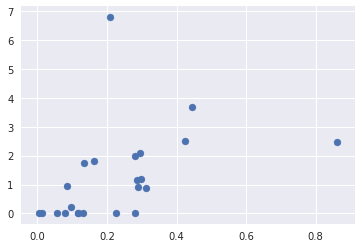

In [36]:
pl.scatter(df_['Average_civilian_firearms_pp'], df_['shootingspp'])
pl.show()

In [37]:
# statsmodels OLS
mod1 = sm.OLS(df_.shootingspp, sm.add_constant(df_.Average_civilian_firearms_pp)).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     4.981
Date:                Wed, 14 Nov 2018   Prob (F-statistic):             0.0367
Time:                        21:19:33   Log-Likelihood:                -40.676
No. Observations:                  23   AIC:                             85.35
Df Residuals:                      21   BIC:                             87.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
const                            0.3684      0.497      0.742      0.467        -0.665     1.402
Average_civilian_firearms_pp     3.8373      1.719      2.232      0.037         0.262     7.413
==============================================================================
Omnibus:                       34.558   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.760
Skew:                           2.666   Prob(JB):                     5.32e-20
Kurtosis:                      11.012   Cond. No.                         5.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


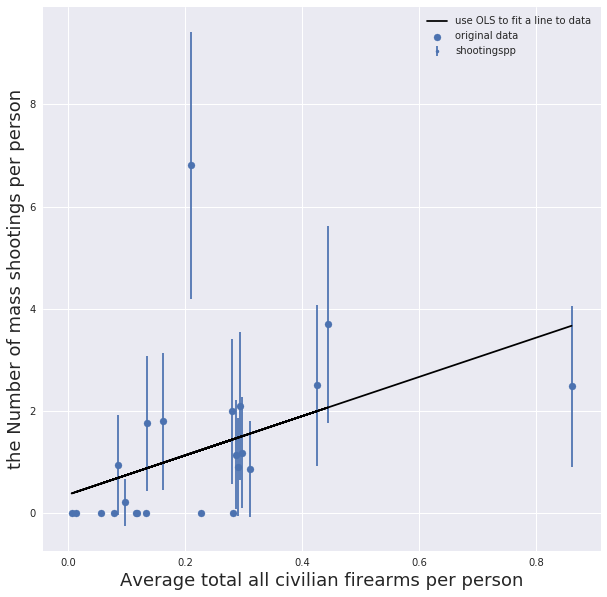

In [38]:
## use OLS fit a line to data
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(df_.Average_civilian_firearms_pp, df_.shootingspp, label = "original data")
ax.errorbar(df_.Average_civilian_firearms_pp, df_.shootingspp, 
            yerr=np.sqrt(df_.shootingspp * 1.0), fmt = '.')
ax.plot(df_.Average_civilian_firearms_pp, mod1.predict(sm.add_constant(df_.Average_civilian_firearms_pp)), 
        color='k', label="use OLS to fit a line to data")
ax.set_xlabel('Average total all civilian firearms per person',fontsize=18)
ax.set_ylabel('the Number of mass shootings per person',fontsize=18)
ax.legend()

## The plot is the number of mass shootings per person vs Average total all civilian firearms per person, and use OLS to fit a line to data.

In [39]:
# statsmodels WLS: use reciprocal of residuals‘ absolute value as weight
mod2 = sm.WLS(df_.shootingspp, sm.add_constant(df_.Average_civilian_firearms_pp), 
              weights=1/abs(mod1.resid)).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.444
Model:                            WLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     16.78
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           0.000516
Time:                        21:19:33   Log-Likelihood:                -27.373
No. Observations:                  23   AIC:                             58.75
Df Residuals:                      21   BIC:                             61.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
const                            0.1286      0.257      0.501      0.622        -0.405     0.662
Average_civilian_firearms_pp     4.1168      1.005      4.097      0.001         2.027     6.207
==============================================================================
Omnibus:                        3.375   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.185   Jarque-Bera (JB):                2.735
Skew:                           0.828   Prob(JB):                        0.255
Kurtosis:                       2.669   Cond. No.                         6.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


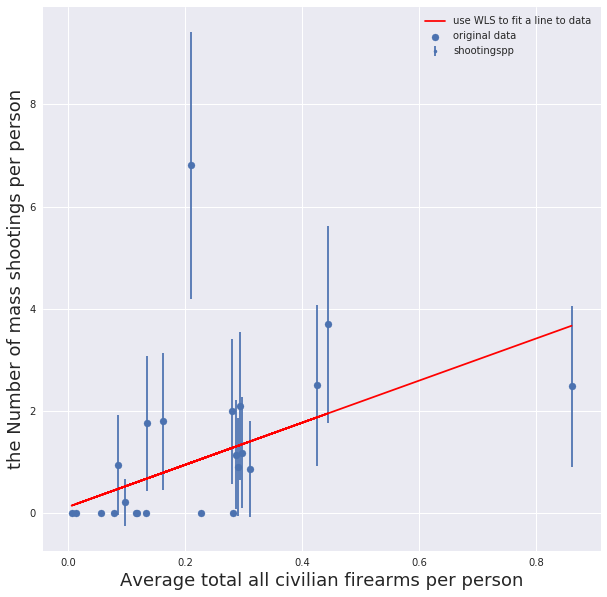

In [40]:
## use WLS to fit a line
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(df_.Average_civilian_firearms_pp, df_.shootingspp, label = "original data")
ax.errorbar(df_.Average_civilian_firearms_pp, df_.shootingspp, 
            yerr=np.sqrt(df_.shootingspp * 1.0), fmt = '.')
ax.plot(df_.Average_civilian_firearms_pp, mod2.predict(sm.add_constant(df_.Average_civilian_firearms_pp)), 
        color='red', label="use WLS to fit a line to data")
ax.set_xlabel('Average total all civilian firearms per person',fontsize=18)
ax.set_ylabel('the Number of mass shootings per person',fontsize=18)
ax.legend()

## The plot is the number of mass shootings per person vs Average total all civilian firearms per person, and use WLS to fit a line to data.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


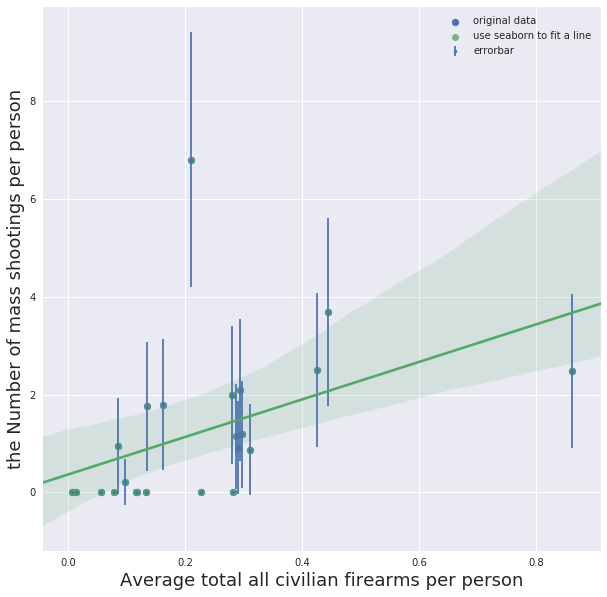

In [41]:
## use seaborn to fit a line
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(df_.Average_civilian_firearms_pp, df_.shootingspp, label = "original data")
ax.errorbar(df_.Average_civilian_firearms_pp, df_.shootingspp, 
            yerr=np.sqrt(df_.shootingspp * 1.0), fmt = '.', label="errorbar")
sns.regplot(df_.Average_civilian_firearms_pp, df_.shootingspp, label="use seaborn to fit a line")
ax.set_xlabel('Average total all civilian firearms per person',fontsize=18)
ax.set_ylabel('the Number of mass shootings per person',fontsize=18)
ax.legend()

In [42]:
coefficient, residuals = np.polyfit(df_.Average_civilian_firearms_pp, df_.shootingspp, deg=1)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


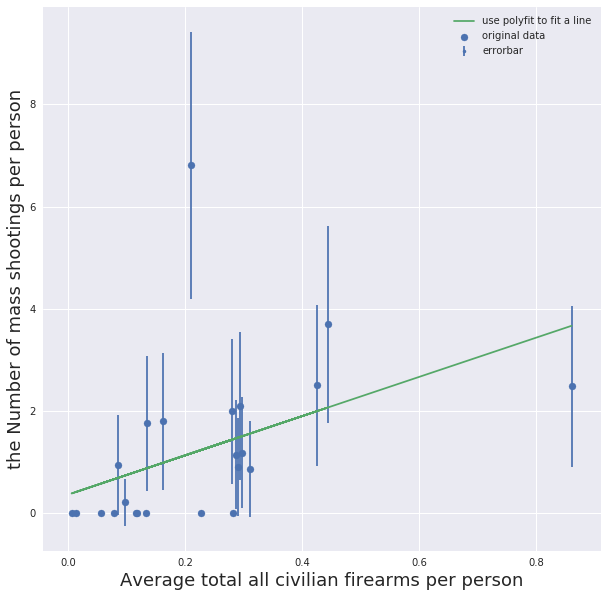

In [43]:
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(df_.Average_civilian_firearms_pp, df_.shootingspp, label = "original data")
ax.errorbar(df_.Average_civilian_firearms_pp, df_.shootingspp, 
            yerr=np.sqrt(df_.shootingspp * 1.0), fmt = '.', label="errorbar")
pl.plot(df_.Average_civilian_firearms_pp, coefficient*df_.Average_civilian_firearms_pp+residuals, label="use polyfit to fit a line")
ax.set_xlabel('Average total all civilian firearms per person',fontsize=18)
ax.set_ylabel('the Number of mass shootings per person',fontsize=18)
ax.legend()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


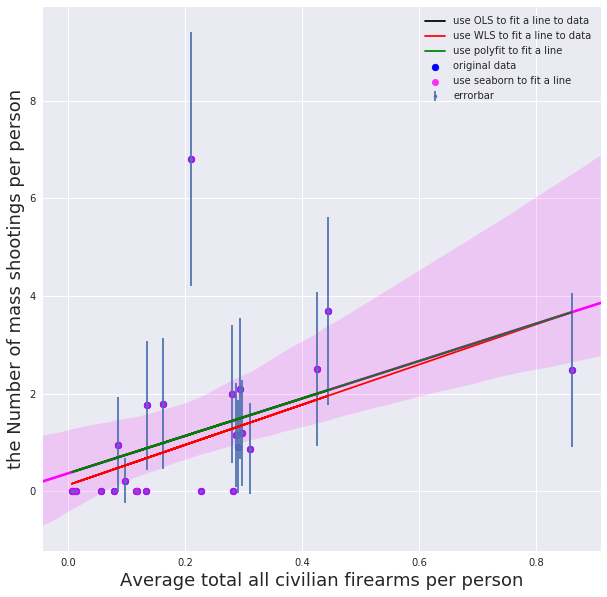

In [44]:
# integrate OLS,WLS,seaborn and polyfit to a figure
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(df_.Average_civilian_firearms_pp, df_.shootingspp, color='blue', label = "original data")
ax.errorbar(df_.Average_civilian_firearms_pp, df_.shootingspp, 
            yerr=np.sqrt(df_.shootingspp * 1.0), fmt = '.', label="errorbar")
ax.plot(df_.Average_civilian_firearms_pp, mod1.predict(sm.add_constant(df_.Average_civilian_firearms_pp)), 
        color='black', label="use OLS to fit a line to data")
ax.plot(df_.Average_civilian_firearms_pp, mod2.predict(sm.add_constant(df_.Average_civilian_firearms_pp)), 
        color='red', label="use WLS to fit a line to data")
sns.regplot(df_.Average_civilian_firearms_pp, df_.shootingspp, color='magenta', label="use seaborn to fit a line")
pl.plot(df_.Average_civilian_firearms_pp, coefficient*df_.Average_civilian_firearms_pp+residuals, color='green', label="use polyfit to fit a line")
ax.set_xlabel('Average total all civilian firearms per person',fontsize=18)
ax.set_ylabel('the Number of mass shootings per person',fontsize=18)
ax.legend()

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

In [45]:
# shootingpp super large is New Zealand
df_[df_['shootingspp']>6]

,pop,Country Name,gdp,Number of homicides by firearm,Average total all civilian firearms,Country,Guns per 100 inhabitants,Number of mass shootings,shootingspp,gdpspp,Average_civilian_firearms_pp,homipp
18,4408100.0,New Zealand,1.761929e+11,7.0,925000.0,New Zealand,22.6,3,6.805653,39970.256245,0.209841,0.001588


In [46]:
# remove USA and New zealand data 
## because New Zealand's shootingspp is super large and USA's firearms per person is very high
df_without_outlier = df_[~((df_['Country Name'] == "United States") | (df_['Country Name'] == "New Zealand"))]
df_without_outlier.head()

,pop,Country Name,gdp,Number of homicides by firearm,Average total all civilian firearms,Country,Guns per 100 inhabitants,Number of mass shootings,shootingspp,gdpspp,Average_civilian_firearms_pp,homipp
0,22742475.0,Australia,1.543411e+12,30.0,3050000.0,Australia,15.0,4,1.758824,67864.689862,0.134110,0.001319
1,8429991.0,Austria,4.094252e+11,18.0,2500000.0,Austria,30.4,1,1.186241,48567.695286,0.296560,0.002135
2,11128246.0,Belgium,4.978842e+11,70.0,1800000.0,Belgium,17.2,2,1.797228,44740.583248,0.161751,0.006290
3,34750545.0,Canada,1.824289e+12,173.0,9950000.0,Canada,30.8,4,1.151061,52496.694870,0.286326,0.004978
4,7996861.0,Switzerland,6.680436e+11,57.0,3400000.0,Switzerland,45.7,2,2.500981,83538.230078,0.425167,0.007128


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


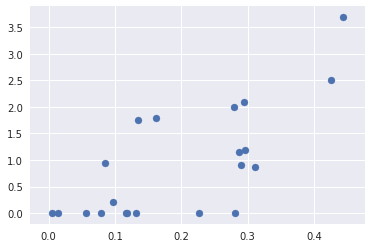

In [47]:
# after removing outlier, the scatter plot
pl.scatter(df_without_outlier['Average_civilian_firearms_pp'], df_without_outlier['shootingspp'])
pl.show()

In [48]:
# use OLS to fit data without outlier
mod1 = sm.OLS(df_without_outlier.shootingspp, sm.add_constant(df_without_outlier.Average_civilian_firearms_pp)).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     21.02
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           0.000202
Time:                        21:19:35   Log-Likelihood:                -22.679
No. Observations:                  21   AIC:                             49.36
Df Residuals:                      19   BIC:                             51.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
const                           -0.2731      0.306     -0.894      0.383        -0.913     0.367
Average_civilian_firearms_pp     6.0230      1.314      4.585      0.000         3.274     8.772
==============================================================================
Omnibus:                        0.185   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.379
Skew:                           0.141   Prob(JB):                        0.828
Kurtosis:                       2.405   Cond. No.                         8.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# statsmodels WLS: use reciprocal of residuals‘ absolute value as weight
# use WLS to fit data without outlier
mod2 = sm.WLS(df_without_outlier.shootingspp, sm.add_constant(df_without_outlier.Average_civilian_firearms_pp), 
              weights=1/abs(mod1.resid)).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.762
Model:                            WLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           2.42e-07
Time:                        21:19:35   Log-Likelihood:                -15.446
No. Observations:                  21   AIC:                             34.89
Df Residuals:                      19   BIC:                             36.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
const                           -0.3143      0.147     -2.145      0.045        -0.621    -0.008
Average_civilian_firearms_pp     6.0111      0.770      7.803      0.000         4.399     7.624
==============================================================================
Omnibus:                        8.546   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                2.020
Skew:                           0.157   Prob(JB):                        0.364
Kurtosis:                       1.513   Cond. No.                         8.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## The WLS's Rsquared has improved.

In [50]:
coefficient, residuals = np.polyfit(df_without_outlier.Average_civilian_firearms_pp, 
                                    df_without_outlier.shootingspp, deg=1)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


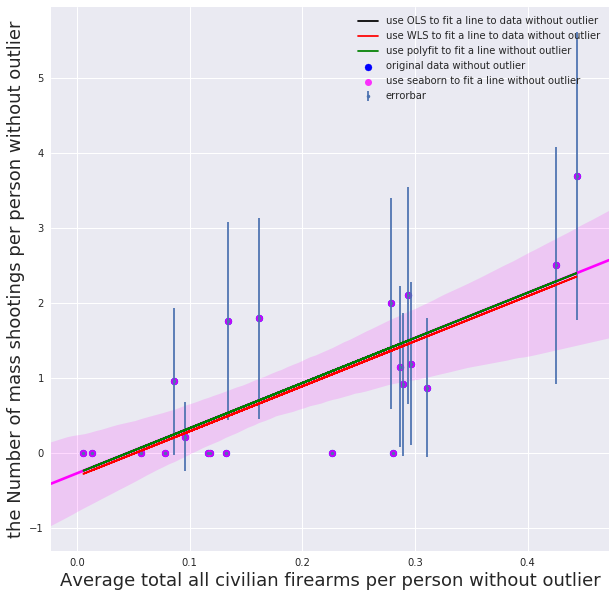

In [51]:
# integrate OLS,WLS,seaborn and polyfit to a figure
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(df_without_outlier.Average_civilian_firearms_pp, 
           df_without_outlier.shootingspp, color='blue', label = "original data without outlier")
ax.errorbar(df_without_outlier.Average_civilian_firearms_pp,
            df_without_outlier.shootingspp, 
            yerr=np.sqrt(df_without_outlier.shootingspp * 1.0), fmt = '.', label="errorbar")
ax.plot(df_without_outlier.Average_civilian_firearms_pp, 
        mod1.predict(sm.add_constant(df_without_outlier.Average_civilian_firearms_pp)), 
        color='black', label="use OLS to fit a line to data without outlier")
ax.plot(df_without_outlier.Average_civilian_firearms_pp, 
        mod2.predict(sm.add_constant(df_without_outlier.Average_civilian_firearms_pp)), 
        color='red', label="use WLS to fit a line to data without outlier")
sns.regplot(df_without_outlier.Average_civilian_firearms_pp, 
            df_without_outlier.shootingspp, color='magenta', label="use seaborn to fit a line without outlier")
pl.plot(df_without_outlier.Average_civilian_firearms_pp, 
        coefficient*df_without_outlier.Average_civilian_firearms_pp+residuals, 
        color='green', label="use polyfit to fit a line without outlier")
ax.set_xlabel('Average total all civilian firearms per person without outlier',fontsize=18)
ax.set_ylabel('the Number of mass shootings per person without outlier',fontsize=18)
ax.legend()

## From the summary table and plot above, it is obvious that R-square has improved and fitting  line behaves better after removing the outlier.


## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

In [52]:
# fit a OLS model and get the parameters:slope and intercept
modOLS = sm.OLS(df_.shootingspp, sm.add_constant(df_.Average_civilian_firearms_pp)).fit()
params = modOLS.params
intercept = params[0]
slope = params[1]
print(intercept,slope)

0.36839728572 3.83730258043


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


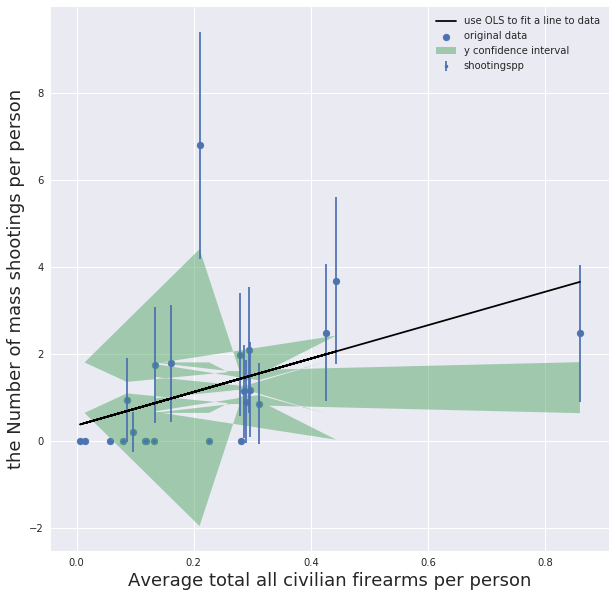

In [53]:
# I choose the third kind of confidence intervals:
## Confidence intervals for average y (predicted) values
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(df_.Average_civilian_firearms_pp, df_.shootingspp, label = "original data")
ax.errorbar(df_.Average_civilian_firearms_pp, df_.shootingspp, 
            yerr=np.sqrt(df_.shootingspp * 1.0), fmt = '.')
ax.plot(df_.Average_civilian_firearms_pp, modOLS.predict(sm.add_constant(df_.Average_civilian_firearms_pp)), 
        color='k', label="use OLS to fit a line to data")
## define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))
yprediction = (df_.Average_civilian_firearms_pp*slope + intercept).mean()
sy = np.sqrt((df_.shootingspp - yprediction )**2 / (len(df_.shootingspp) - 2))
tp = sp.stats.t.ppf(0.975, len(df_.shootingspp)-2)
confidence_interval = tp * sy * np.sqrt(1 + 1/len(df_.shootingspp) + 
                                     (df_.shootingspp - df_.shootingspp.mean())**2 / 
                                     ((df_.shootingspp - df_.shootingspp.mean())**2).sum())
pl.fill_between(df_.Average_civilian_firearms_pp, 
                yprediction - confidence_interval, 
                yprediction + confidence_interval, 
                alpha=0.5, label="y confidence interval")
ax.set_xlabel('Average total all civilian firearms per person',fontsize=18)
ax.set_ylabel('the Number of mass shootings per person',fontsize=18)
ax.legend()

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


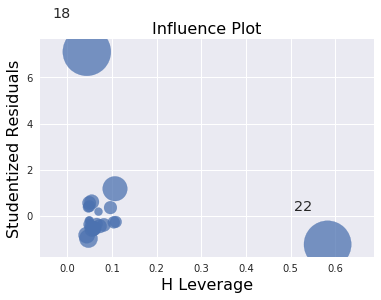

In [54]:
modelOLS = sm.OLS(df_.shootingspp, sm.add_constant(df_.Average_civilian_firearms_pp)).fit()
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## The H-leverage of 22 is United States, the outlier. It has the highest leverage/influence. It will decrease its studentized or standized residuals because it will pull the line more toward to it compared to other points.

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings

In [55]:
# fit WLS to data
modelWLS = sm.WLS(df_.shootingspp, sm.add_constant(df_.Average_civilian_firearms_pp), weights=1/(modelOLS.resid**2)).fit()

In [56]:
## calculate the H_leverage
## the formula is from http://www.stat.ucla.edu/~nchristo/introeconometrics/introecon_compute_sres_hat.pdf
H_leverage = 1/len(df_.Average_civilian_firearms_pp) + (df_.Average_civilian_firearms_pp - df_.Average_civilian_firearms_pp.mean())**2/((df_.Average_civilian_firearms_pp - df_.Average_civilian_firearms_pp.mean())**2).sum()

In [57]:
#calculate the standard error of the mean
se = sp.stats.sem(df_.shootingspp)

In [58]:
#calculate the standardized_residuals. 
## The formula is from http://www.stat.ucla.edu/~nchristo/introeconometrics/introecon_compute_sres_hat.pdf
standardized_residuals = modelWLS.resid/( se * (np.sqrt(1 - H_leverage)))

Text(0.5,1,'Standardized Residuals VS. H leverage')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


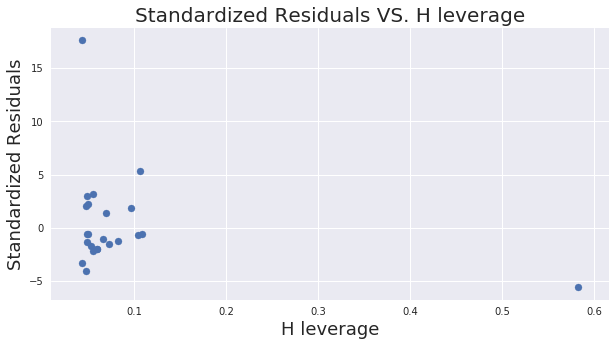

In [59]:
## plot the Standardized Residuals VS. H leverage  of WLS model
fig = plt.figure(figsize=(10,5))
plt.scatter(H_leverage, standardized_residuals)
plt.xlabel("H leverage", fontsize=18)
plt.ylabel("Standardized Residuals", fontsize=18)
plt.title("Standardized Residuals VS. H leverage", fontsize=20)

## Compared to the OLS model, WLS model's plot of Standardized Residuals VS. H leverage is similar to it, including the H leverage value. The only difference is Standardized Residuals increasing. WLS standardized Residuals is from -5 to 20. and OLS standardized Residuals are from 0 to 8. 